# Data Exploration Analysis For the Sales Prediction Data
### EDA Steps:
1. Data Assessing 
2. Data Cleaning
3. Univariate EDA
4. Bivariate EDA
5. Multivariate EDA
6. Outliers Detection

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

# 1. Data Assessment

In [2]:
df = pd.read_csv("data\Train.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\USER\AppData\Local\Temp\ipykernel_13784\2579968911.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv("data\Train.csv")


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# define numerical & categorical columns in train data
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print numerical & categorical columns in train data
print('We have {} numerical features in train data and they as as follows : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features train data and they as as follows: {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features in train data and they as as follows : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

We have 7 categorical features train data and they as as follows: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [10]:
print('Number of unique data points in categorical features in Train data')
print('Number of unique data points in Item_Identifier:', df['Item_Identifier'].unique())
print('Number of unique data points in Item_Fat_Content:', df['Item_Fat_Content'].unique())
print('Number of unique data points in Item_Type:',df['Item_Type'].unique())
print('Number of unique data points in Outlet_Identifier:', df['Outlet_Identifier'].unique())
print('Number of unique data points in Outlet_Size:', df['Outlet_Size'].unique())
print('Number of unique data points in Outlet_Location_Type:', df['Outlet_Location_Type'].unique())
print('Number of unique data points in Outlet_Type:', df['Outlet_Type'].unique())

Number of unique data points in categorical features in Train data
Number of unique data points in Item_Identifier: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Number of unique data points in Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Number of unique data points in Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Number of unique data points in Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Number of unique data points in Outlet_Size: ['Medium' nan 'High' 'Small']
Number of unique data points in Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
Number of unique data points in Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


# 2. Data Cleaning

In [11]:
# Drop rows with missing values
#f = df.dropna()

#creating our new column for both datasets
df['Outlet_Age']= df ['Outlet_Establishment_Year'].apply(lambda year: 2023 - year)

# Standardize values in the 'Item_Fat_Content' column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df.drop('Outlet_Establishment_Year', axis = 1, inplace  = True)

# 3. Univariate EDA

#### Summary Statistics for Numeric Features:

In [12]:
# Compute basic statistics
numeric_stats = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Age']].describe()

# Display the summary statistics
print(numeric_stats)

       Item_Weight  Item_Visibility     Item_MRP  Item_Outlet_Sales  \
count  7060.000000      8523.000000  8523.000000        8523.000000   
mean     12.857645         0.066132   140.992782        2181.288914   
std       4.643456         0.051598    62.275067        1706.499616   
min       4.555000         0.000000    31.290000          33.290000   
25%       8.773750         0.026989    93.826500         834.247400   
50%      12.600000         0.053931   143.012800        1794.331000   
75%      16.850000         0.094585   185.643700        3101.296400   
max      21.350000         0.328391   266.888400       13086.964800   

        Outlet_Age  
count  8523.000000  
mean     25.168133  
std       8.371760  
min      14.000000  
25%      19.000000  
50%      24.000000  
75%      36.000000  
max      38.000000  


#### Distribution Plots for Numeric Features:

Text(0.5, 1.0, 'Distribution of Item_Outlet_Sales')

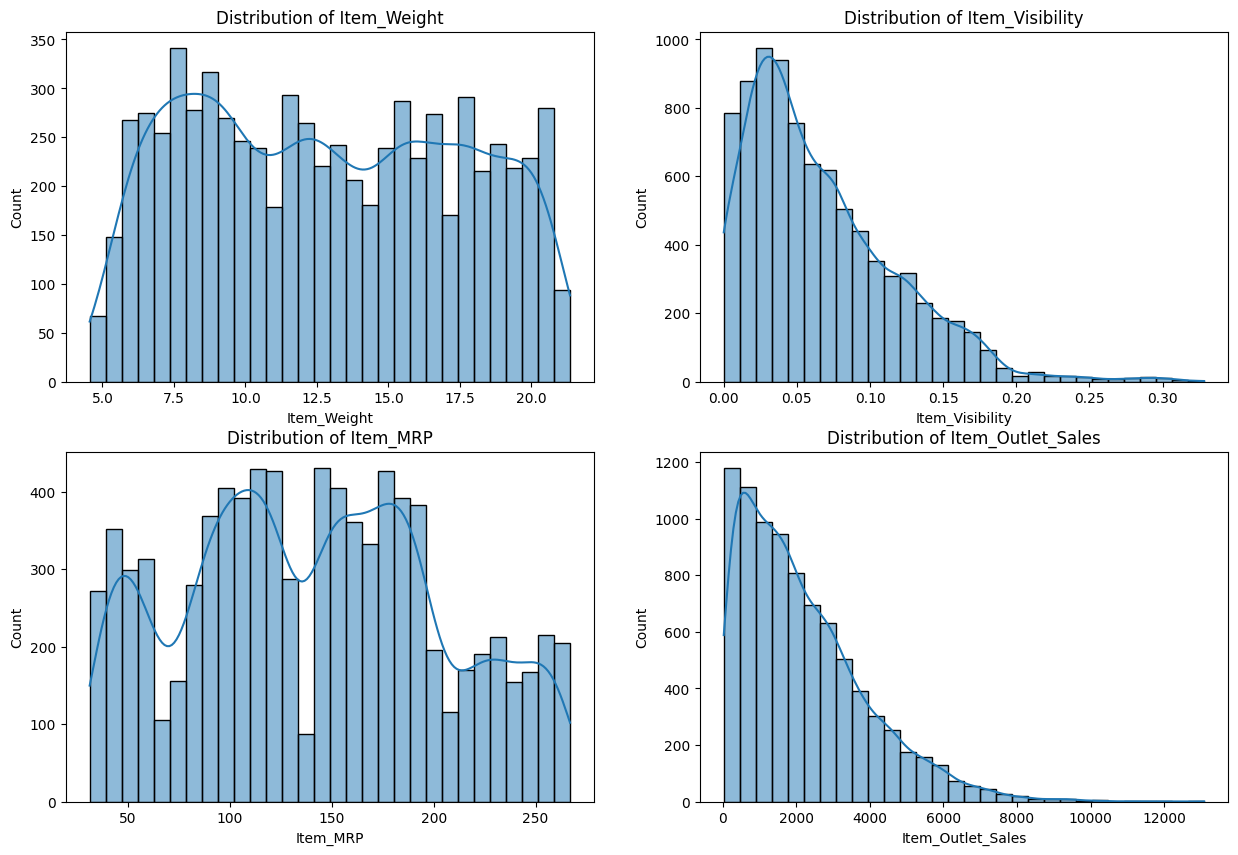

In [13]:
# Create subplots for distribution plots
plt.figure(figsize=(15, 10))

# Distribution Plot for Item_Weight
plt.subplot(221)
sns.histplot(df['Item_Weight'], kde=True, bins=30)
plt.title('Distribution of Item_Weight')

# Distribution Plot for Item_Visibility
plt.subplot(222)
sns.histplot(df['Item_Visibility'], kde=True, bins=30)
plt.title('Distribution of Item_Visibility')

# Distribution Plot for Item_MRP
plt.subplot(223)
sns.histplot(df['Item_MRP'], kde=True, bins=30)
plt.title('Distribution of Item_MRP')

# Distribution Plot for Item_Outlet_Sales
plt.subplot(224)
sns.histplot(df['Item_Outlet_Sales'], kde=True, bins=30)
plt.title('Distribution of Item_Outlet_Sales')

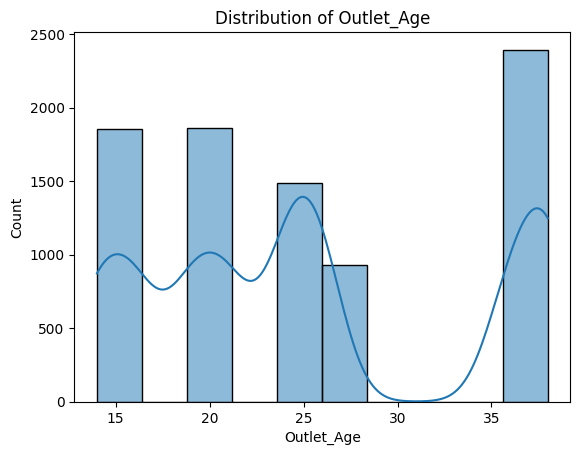

In [14]:
# Distribution Plot for Outlet_Age
sns.histplot(df['Outlet_Age'], kde=True, bins=10)
plt.title('Distribution of Outlet_Age')
plt.show()

#### Count Plots for Categorical Features:

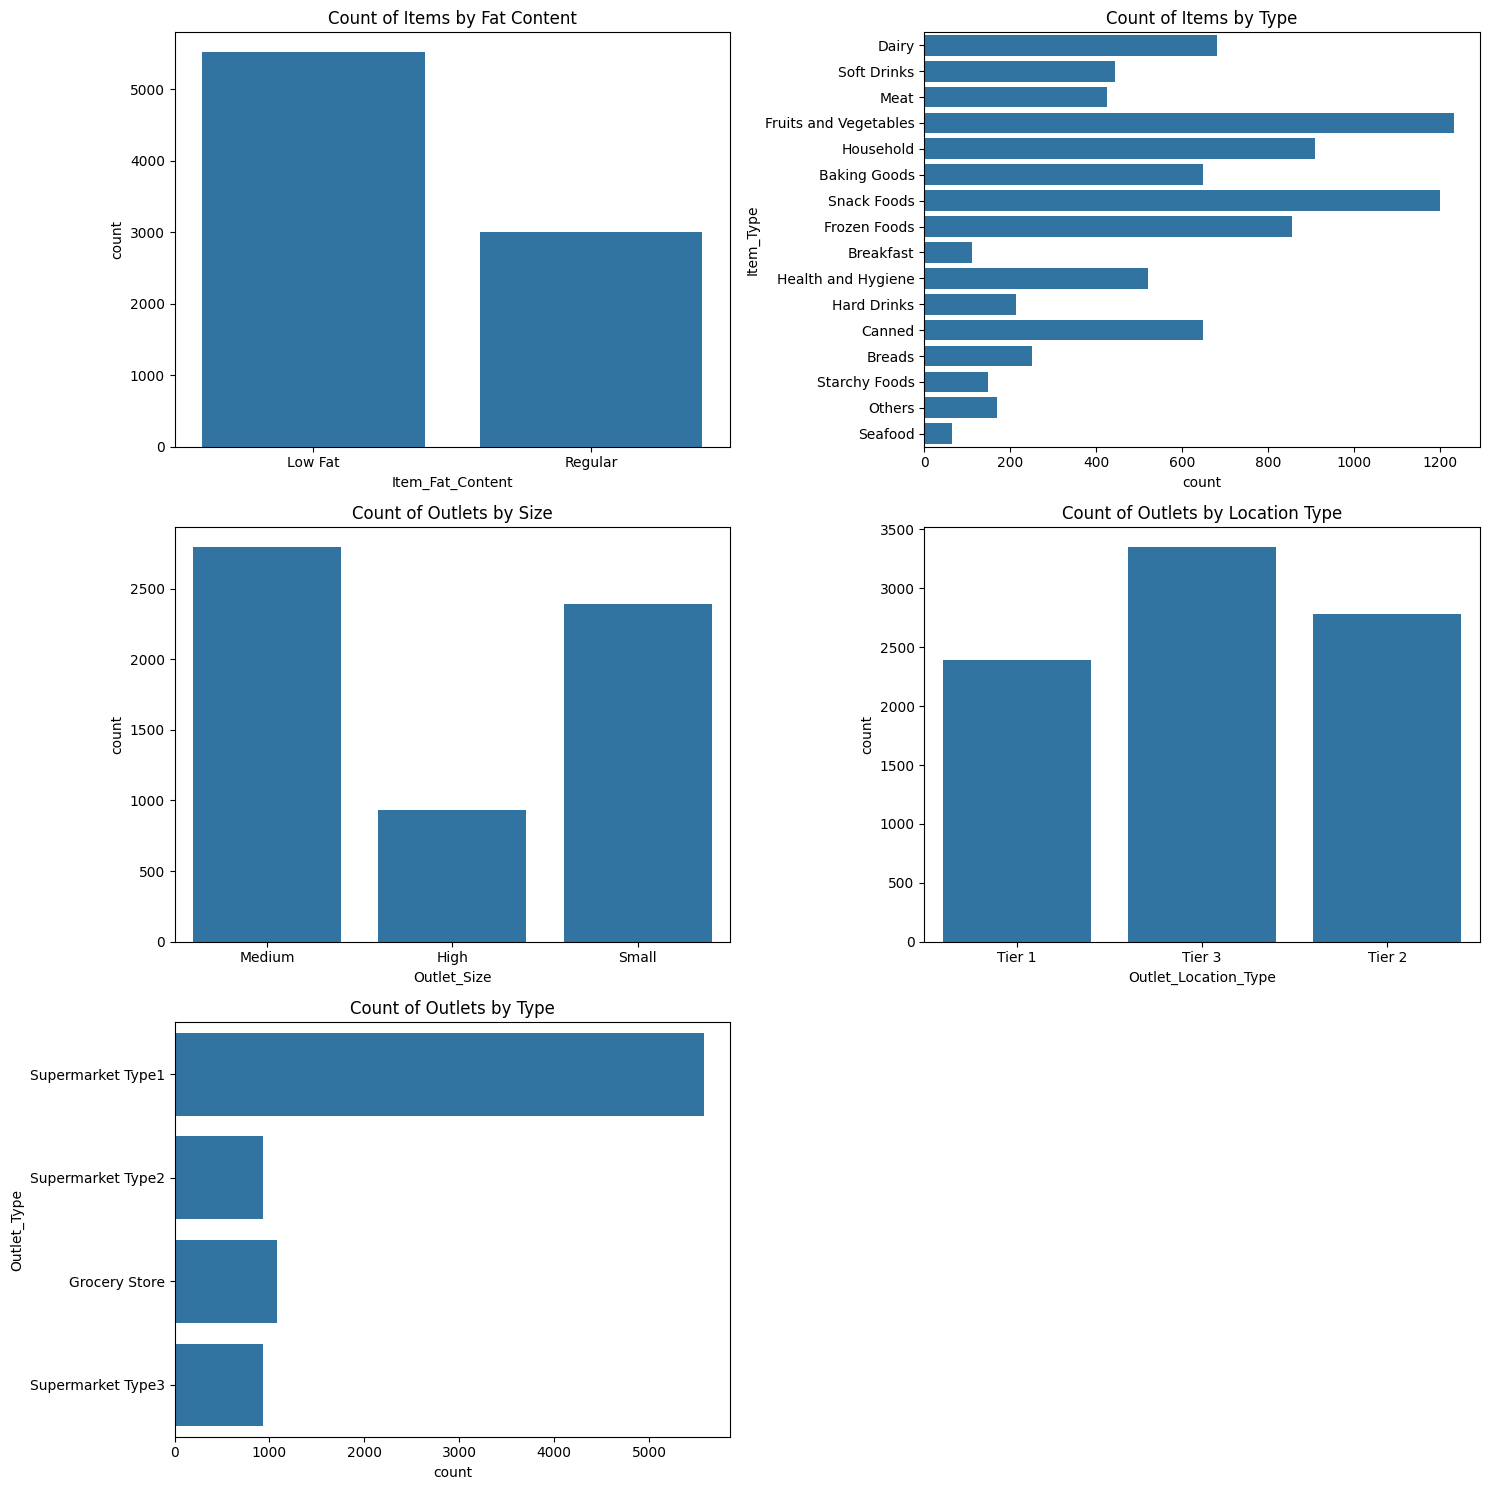

In [15]:
# Create subplots for count plots
plt.figure(figsize=(15, 15))

# Count Plot for Item_Fat_Content
plt.subplot(321)
sns.countplot(data=df, x='Item_Fat_Content')
plt.title('Count of Items by Fat Content')

# Count Plot for Item_Type
plt.subplot(322)
sns.countplot(data=df, y='Item_Type')
plt.title('Count of Items by Type')

# Count Plot for Outlet_Size
plt.subplot(323)
sns.countplot(data=df, x='Outlet_Size')
plt.title('Count of Outlets by Size')

# Count Plot for Outlet_Location_Type
plt.subplot(324)
sns.countplot(data=df, x='Outlet_Location_Type')
plt.title('Count of Outlets by Location Type')

# Count Plot for Outlet_Type
plt.subplot(325)
sns.countplot(data=df, y='Outlet_Type')
plt.title('Count of Outlets by Type')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'frequency')

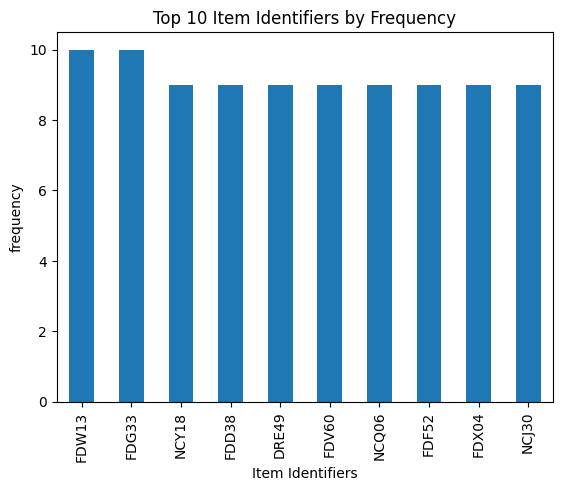

In [16]:
# Unique values and their frequencies in Item_Identifier
item_identifier_counts = df['Item_Identifier'].value_counts().head(10)
item_identifier_counts.plot(kind = 'bar')
plt.title("Top 10 Item Identifiers by Frequency")
plt.xlabel('Item Identifiers')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

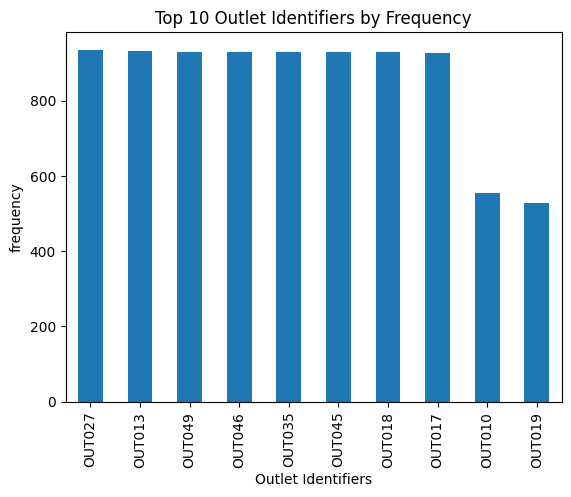

In [17]:
# Unique values and their frequencies in Item_Identifier
item_identifier_counts = df['Outlet_Identifier'].value_counts().head(10)
item_identifier_counts.plot(kind = 'bar')
plt.title("Top 10 Outlet Identifiers by Frequency")
plt.xlabel('Outlet Identifiers')
plt.ylabel('frequency')

# 4. Bivariate EDA

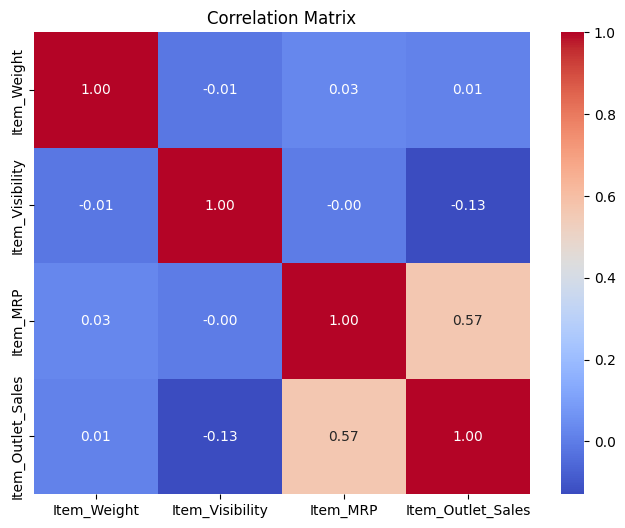

In [18]:
# Calculate the correlation matrix
correlation_matrix = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


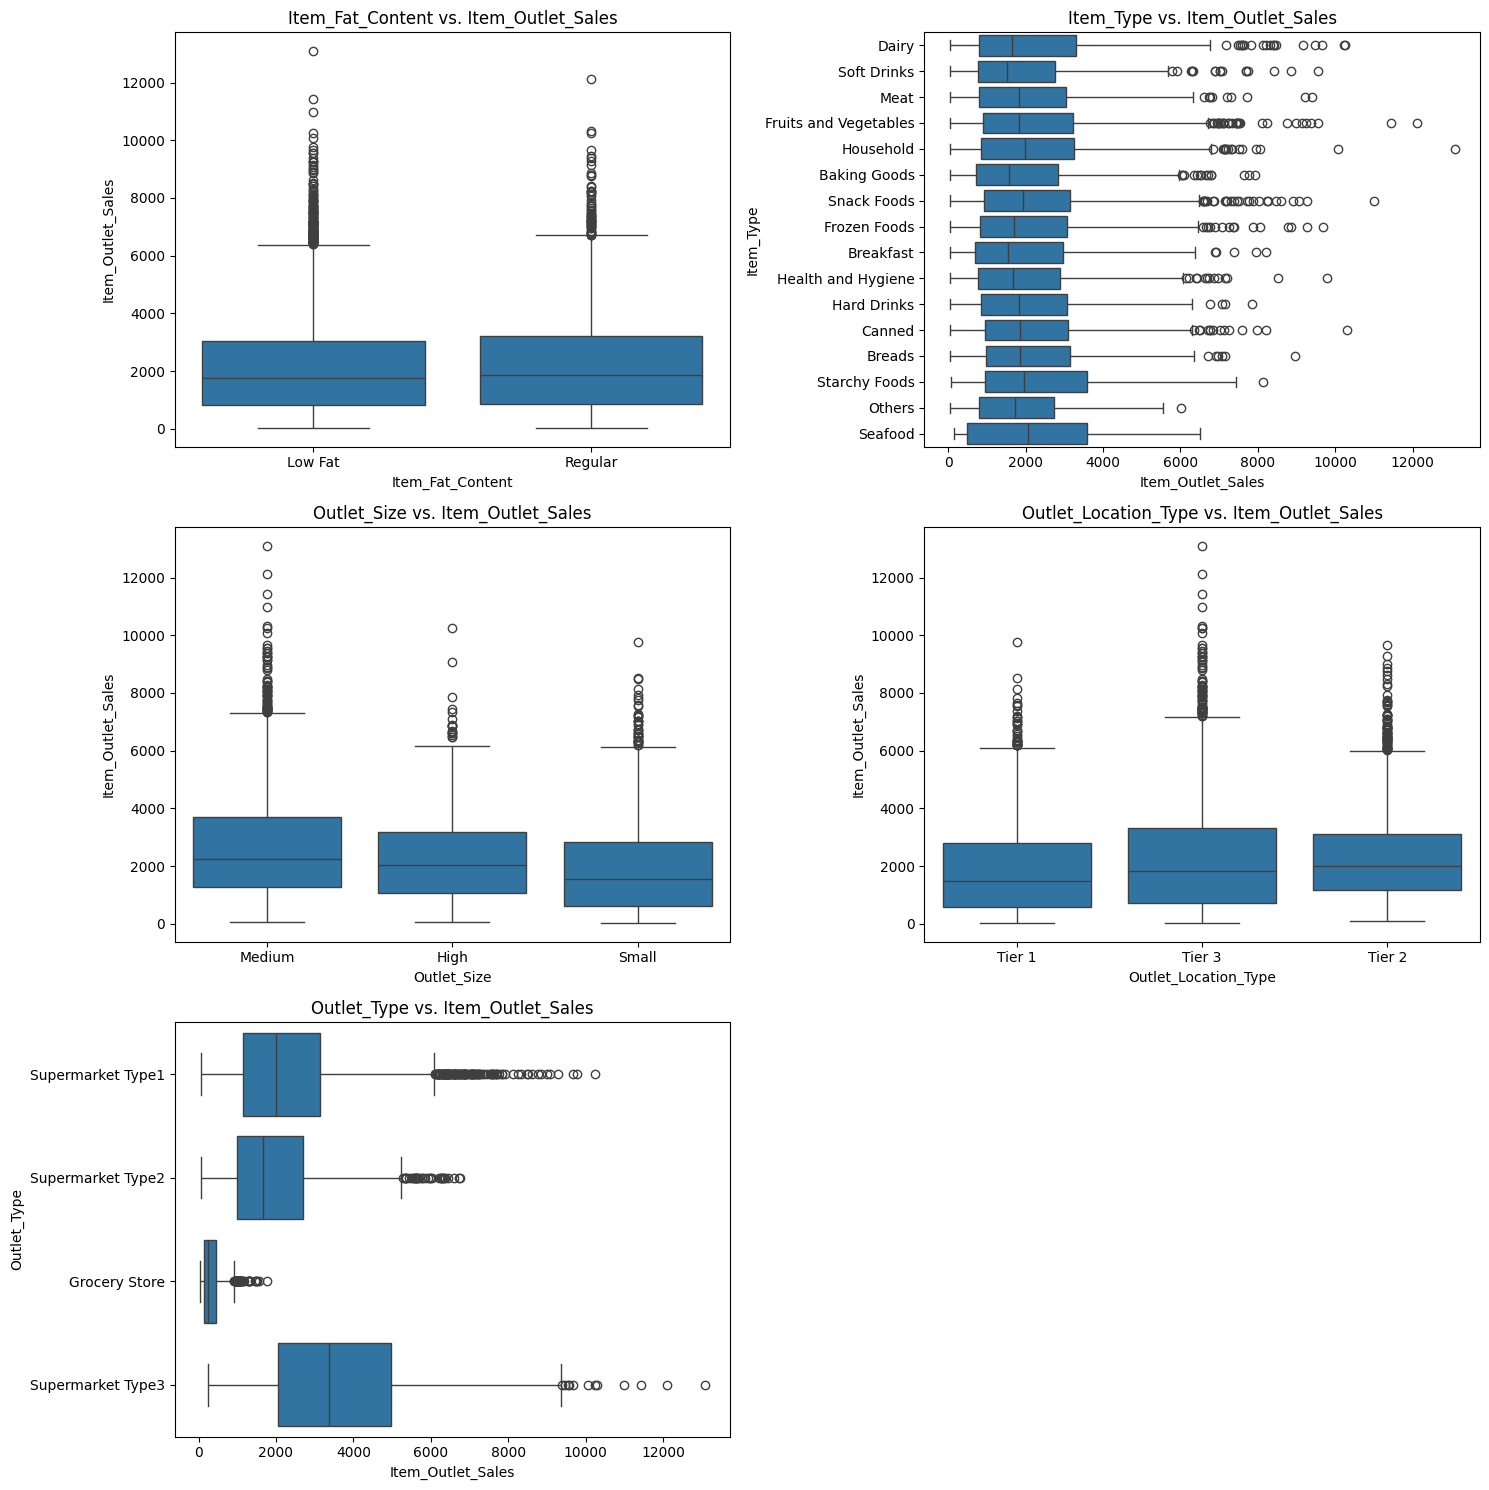

In [19]:
# Create subplots for box plots
plt.figure(figsize=(15, 15))

# Box Plot for Item_Fat_Content vs. Item_Outlet_Sales
plt.subplot(321)
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.title('Item_Fat_Content vs. Item_Outlet_Sales')

# Box Plot for Item_Type vs. Item_Outlet_Sales
plt.subplot(322)
sns.boxplot(data=df, y='Item_Type', x='Item_Outlet_Sales')
plt.title('Item_Type vs. Item_Outlet_Sales')

# Box Plot for Outlet_Size vs. Item_Outlet_Sales
plt.subplot(323)
sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Outlet_Size vs. Item_Outlet_Sales')

# Box Plot for Outlet_Location_Type vs. Item_Outlet_Sales
plt.subplot(324)
sns.boxplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Outlet_Location_Type vs. Item_Outlet_Sales')

# Box Plot for Outlet_Type vs. Item_Outlet_Sales
plt.subplot(325)
sns.boxplot(data=df, y='Outlet_Type', x='Item_Outlet_Sales')
plt.title('Outlet_Type vs. Item_Outlet_Sales')

plt.tight_layout()
plt.show()


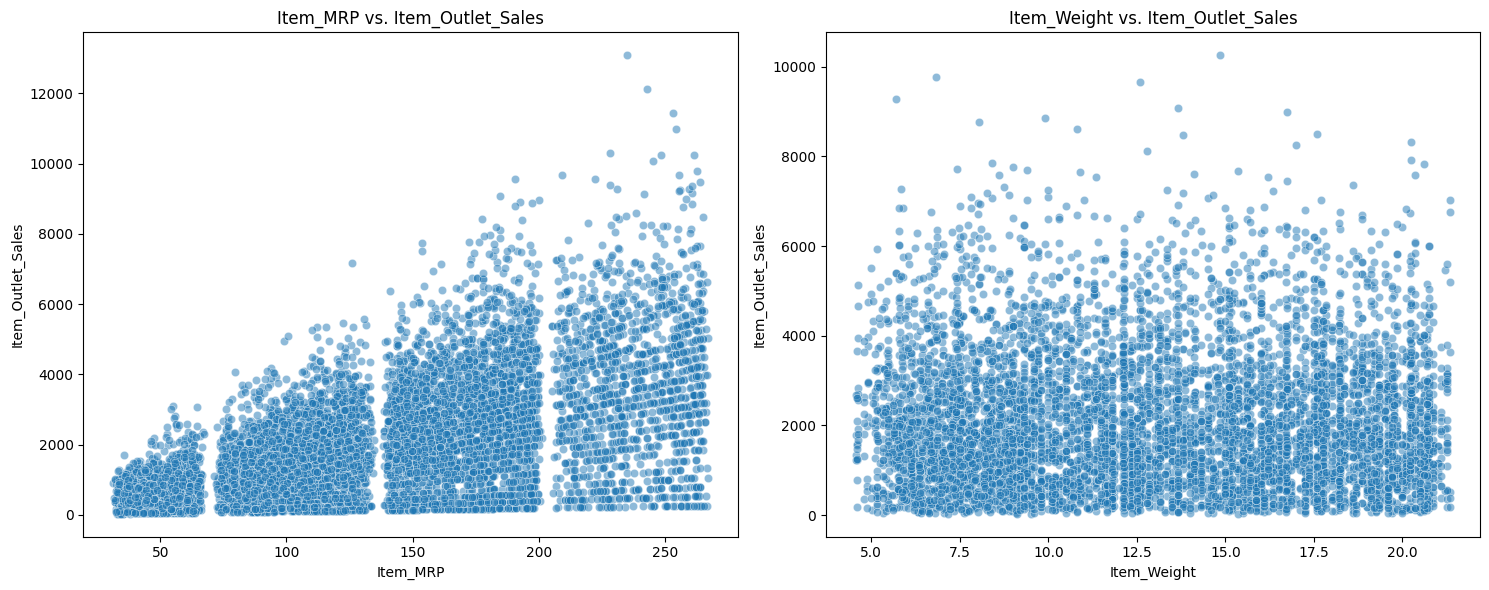

In [20]:
# Create subplots for scatter plots
plt.figure(figsize=(15, 6))

# Scatter Plot for Item_MRP vs. Item_Outlet_Sales
plt.subplot(121)
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', alpha=0.5)
plt.title('Item_MRP vs. Item_Outlet_Sales')

# Scatter Plot for Item_Weight vs. Item_Outlet_Sales
plt.subplot(122)
sns.scatterplot(data=df, x='Item_Weight', y='Item_Outlet_Sales', alpha=0.5)
plt.title('Item_Weight vs. Item_Outlet_Sales')

plt.tight_layout()
plt.show()


# 5. Multivariate EDA

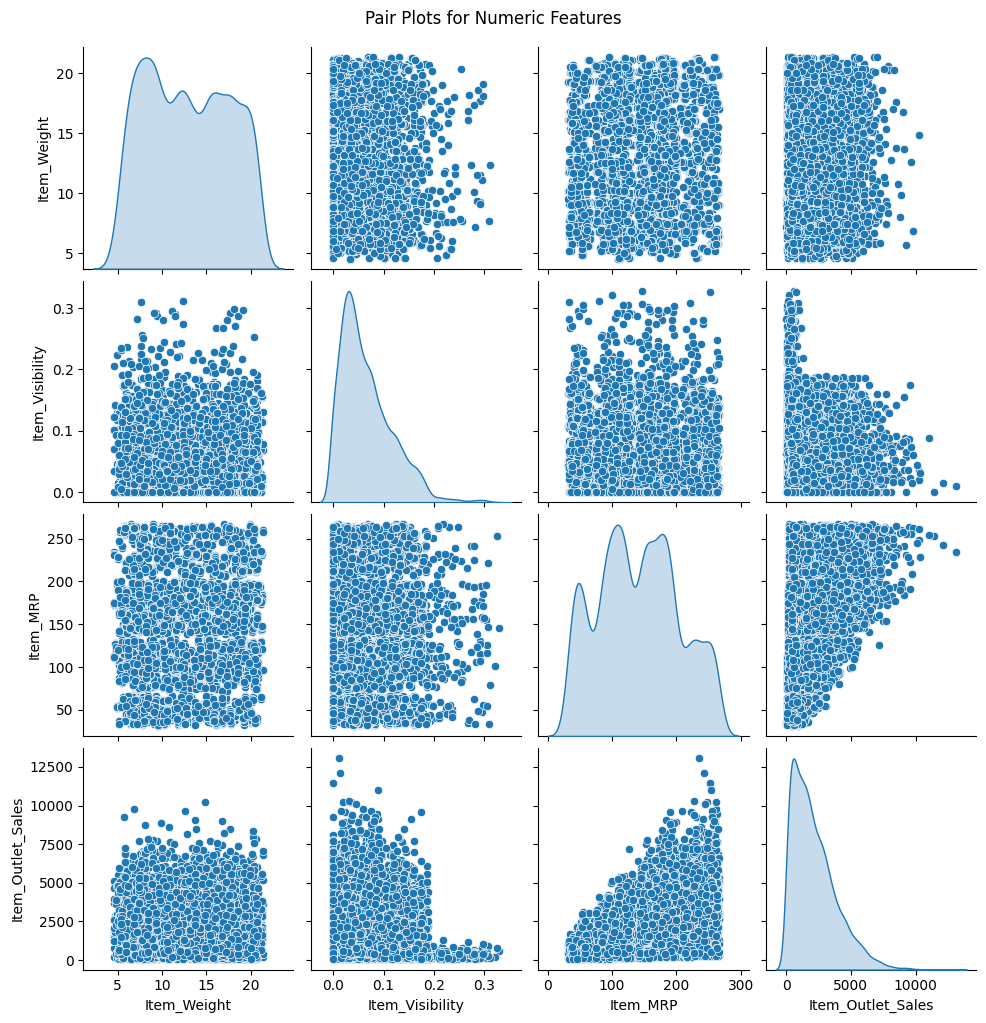

In [21]:
# Create pair plots for numeric features
sns.pairplot(df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']], diag_kind='kde')
plt.suptitle("Pair Plots for Numeric Features", y=1.02)
plt.show()


#### Heatmap for Multicollinearity:

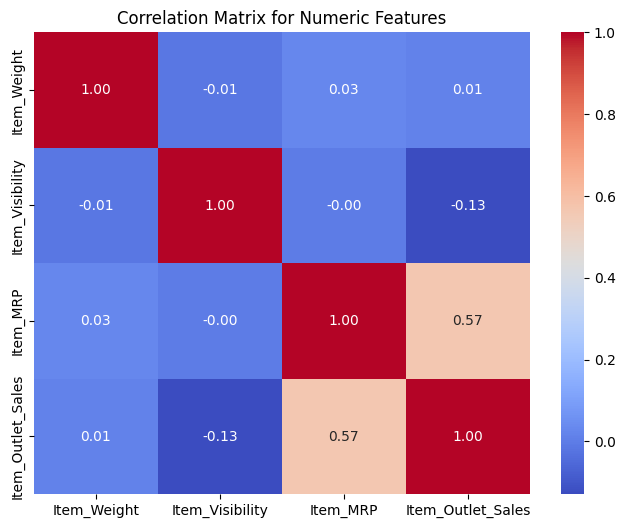

In [22]:
# Calculate the correlation matrix for all numeric features
correlation_matrix_all = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].corr()

# Create a heatmap to visualize multicollinearity
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Features')
plt.show()


#### Interaction Effects
To investigate interaction effects between features, you can create categorical plots. Let's examine how Item_Type interacts with Outlet_Type in affecting sales:

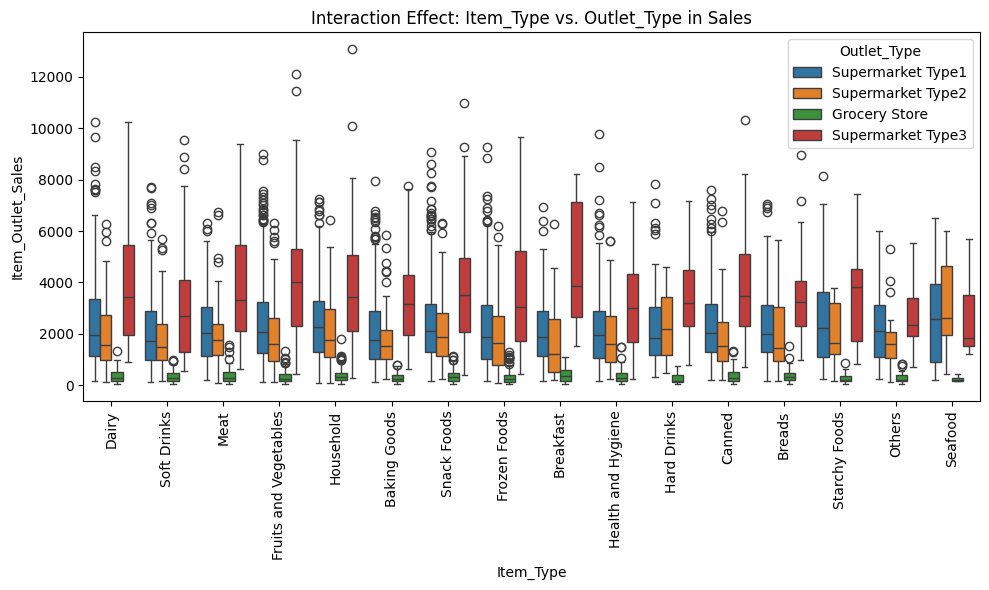

In [23]:
# Create a categorical plot (e.g., box plot) to visualize interaction effects
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.title('Interaction Effect: Item_Type vs. Outlet_Type in Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# 6. Outlier Detection Approaches
Outliers can significantly impact model performance and the accuracy of statistical analysis. Here's how you can perform outlier detection

### 1. Visual Inspection with Box Plots:

We will start by creating box plots for numeric features (Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales) to identify potential outliers.

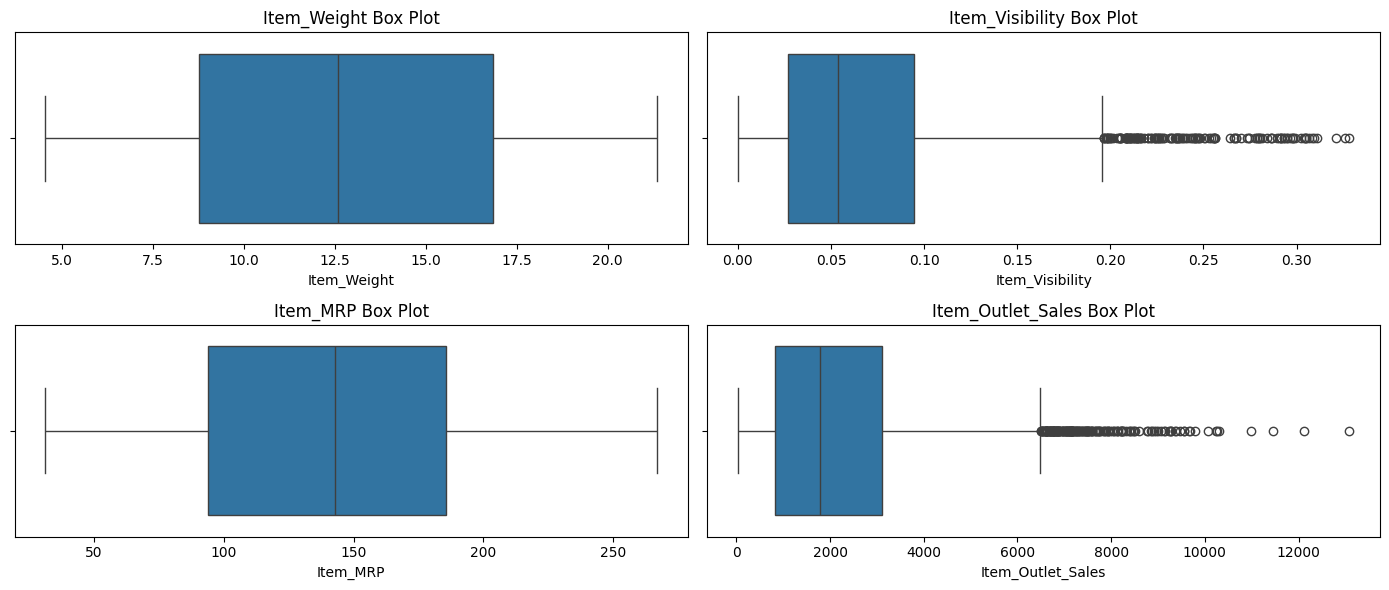

In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(221)
sns.boxplot(data=df, x='Item_Weight')
plt.title('Item_Weight Box Plot')

plt.subplot(222)
sns.boxplot(data=df, x='Item_Visibility')
plt.title('Item_Visibility Box Plot')

plt.subplot(223)
sns.boxplot(data=df, x='Item_MRP')
plt.title('Item_MRP Box Plot')

plt.subplot(224)
sns.boxplot(data=df, x='Item_Outlet_Sales')
plt.title('Item_Outlet_Sales Box Plot')

plt.tight_layout()
plt.show()


### 2. Statistical Methods - IQR (Interquartile Range):
We can calculate the IQR (Interquartile Range) for each numeric feature and then determine data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR as potential outliers.

In [25]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_weight = find_outliers_iqr(df, 'Item_Weight')
outliers_visibility = find_outliers_iqr(df, 'Item_Visibility')
outliers_mrp = find_outliers_iqr(df, 'Item_MRP')
outliers_sales = find_outliers_iqr(df, 'Item_Outlet_Sales')

print("Number of outliers in Item_Weight:", len(outliers_weight))
print("Number of outliers in Item_Visibility:", len(outliers_visibility))
print("Number of outliers in Item_MRP:", len(outliers_mrp))
print("Number of outliers in Item_Outlet_Sales:", len(outliers_sales))


Number of outliers in Item_Weight: 0
Number of outliers in Item_Visibility: 144
Number of outliers in Item_MRP: 0
Number of outliers in Item_Outlet_Sales: 186


### 3. Visualize Outliers
To visualize outliers in relation to the target variable (Item_Outlet_Sales), we can create scatter plots.

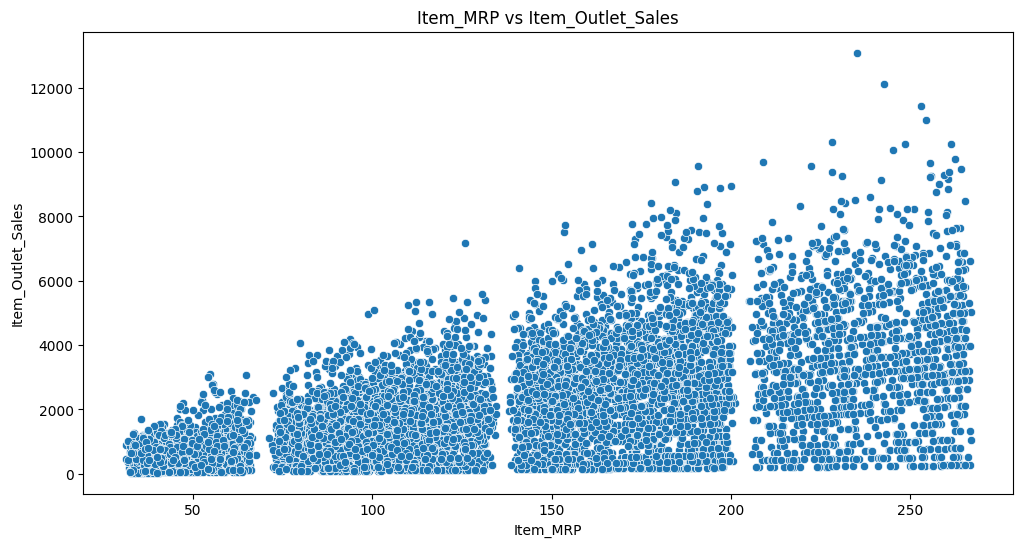

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales')
plt.title('Item_MRP vs Item_Outlet_Sales')
plt.show()


In [27]:
from scipy import stats

# Subset the data for medium-sized and small-sized outlets
medium_sales = df[df['Outlet_Size'] == 'Medium']['Item_Outlet_Sales']
small_sales = df[df['Outlet_Size'] == 'Small']['Item_Outlet_Sales']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(medium_sales, small_sales, equal_var=False)

alpha = 0.05  # Set the significance level

if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference in Item_Outlet_Sales.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Item_Outlet_Sales.")


Reject the null hypothesis. There is a significant difference in Item_Outlet_Sales.
